In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\NarayananM\Videos\ML-AI\Dataset\NCI60_X.csv', index_col=0)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,-0.244980,...,-0.590020,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000
V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,-0.084981,...,0.189980,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000
V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,-0.244980,...,-0.210019,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000
V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,-0.114980,...,0.089980,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000
V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,1.145019,...,0.299980,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [6]:
x_raw = df.copy()


In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


Standard scaling all columns

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

Creating 4 means Cluster

In [9]:
kmc = KMeans(n_clusters=4)
kmc.fit(x_scaled)

c:\Users\NarayananM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

creating 4 agglomerative clusters



In [10]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(x_scaled)

AgglomerativeClustering(n_clusters=4)

In [11]:
kmc_score = silhouette_score(x_scaled, kmc.labels_, metric = 'euclidean')
agg_score = silhouette_score(x_scaled, agg.labels_, metric = 'euclidean')
from sklearn.decomposition import PCA

Reducing features to 25 principal components



In [12]:
pca = PCA(n_components=25)
x_scaled_pca = pca.fit_transform(x_scaled)
scaled_pca_df = pd.DataFrame(x_scaled_pca)
scaled_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.838010,-3.555084,-9.813614,-0.821617,12.622084,7.487003,14.225040,-3.212753,21.885170,-20.438572,...,-5.856465,20.338377,8.965569,-7.501994,7.606281,-8.523977,-7.726255,11.342460,13.744786,-8.703606
1,-23.089281,-6.441287,-13.480563,5.630160,8.029747,3.691756,10.064664,-7.105989,22.399309,-13.072259,...,5.923535,18.771922,3.283480,-9.345234,17.425771,0.469837,-10.270418,2.365019,9.577187,-4.404143
2,-27.456146,-2.465611,-3.533537,-1.344499,12.554028,17.366763,10.328099,-2.724287,-0.231955,-6.489722,...,-7.232803,13.082647,-0.979976,2.970580,5.487207,-1.870142,8.220575,-4.394878,0.798741,-6.798858
3,-42.816776,9.769027,-0.889312,3.451696,42.272594,27.226026,17.535947,-0.576422,14.222026,16.012480,...,-21.243643,-3.259466,1.740605,-2.181576,-0.113505,6.336872,-17.061644,7.402477,-15.381847,5.608499
4,-55.418626,5.197889,-21.096965,15.842177,10.433471,13.010981,12.520609,32.604115,-7.770059,-10.015255,...,-5.540954,-20.717428,-17.196559,2.965901,2.849611,3.026775,9.234126,5.168764,-11.042219,-18.400846
5,-27.177957,-6.780079,-21.813607,13.845315,-7.987684,0.720195,28.064835,31.204102,-10.942708,2.283789,...,-18.147717,-3.258536,12.334710,4.765415,-24.896999,-7.022384,-7.169699,-7.804731,-2.543070,29.388459
6,-31.445995,-3.864546,-30.350617,41.662017,-10.452015,-17.019854,23.694099,-0.991654,14.262976,-7.826823,...,14.333159,-16.562105,-12.073890,-13.817380,6.776309,-9.835944,1.381001,10.135966,7.474723,12.153172
7,-22.332412,-10.396517,-18.755385,6.943725,5.498087,11.702106,11.755921,22.873004,-3.629641,-5.092157,...,9.030394,16.321627,-5.293337,4.598433,-12.729747,30.604795,-3.453764,-2.458171,-14.007884,-7.730482
8,-14.289740,-16.108289,-19.758972,6.566975,3.839802,-8.016496,-13.051723,7.133822,0.896581,-7.921176,...,-6.561218,1.377108,-7.374956,1.176602,-3.671237,-9.307478,16.306643,0.857966,4.215990,-6.712076
9,-29.748137,-23.993860,-5.883771,-10.013447,-3.440430,11.702933,0.572454,7.970398,-20.141768,-28.076258,...,13.314848,-6.449753,36.617431,12.160617,17.671176,17.494872,28.170816,-4.555252,5.619443,11.936842


In [13]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.11358942 0.06756202 0.05751842 0.04247553 0.03734963 0.03618613
 0.0306609  0.02685765 0.02529401 0.02375658 0.02356126 0.02162907
 0.02048069 0.01978191 0.0191366  0.01769121 0.01661708 0.01606422
 0.01587087 0.01543472 0.0150371  0.01474485 0.0143249  0.01347311
 0.01310603]
0.7182039000618479


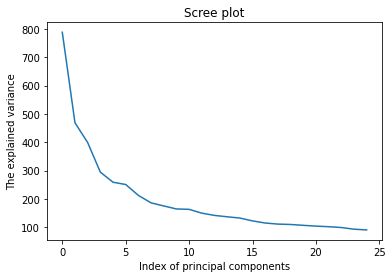

In [14]:
ax = sns.lineplot(pca.explained_variance_)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance")
plt.show()

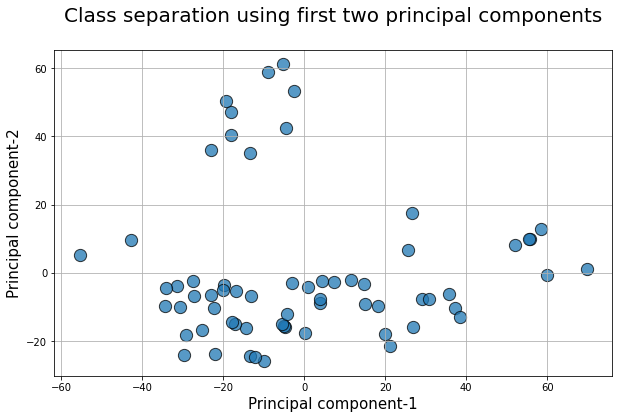

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled_pca[:,0],x_scaled_pca[:,1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

creating 4 kmeans clusters on pca reduced dataset



In [16]:
kmc_pca = KMeans(n_clusters=4)
kmc_pca.fit(x_scaled_pca)

c:\Users\NarayananM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

creating 4 kmeans Aggregate clusters on pca reduced dataset



In [17]:
agg_pca = AgglomerativeClustering(n_clusters=4)
agg_pca.fit(x_scaled_pca)

AgglomerativeClustering(n_clusters=4)

In [18]:
kmc_score_pca = silhouette_score(x_scaled_pca, kmc_pca.labels_, metric = 'euclidean')
agg_score_pca = silhouette_score(x_scaled_pca, agg_pca.labels_, metric = 'euclidean')

Comparing Score

In [19]:
comparison = (('Raw Data', kmc_score, agg_score),
      ('PCA reduced', kmc_score_pca, agg_score_pca))
comparison_df = pd.DataFrame(comparison, columns = ["Dataset", "KMeans", "Agglomerative"])
comparison_df.set_index('Dataset', inplace=True)
comparison_df


,KMeans,Agglomerative
Dataset,,
Raw Data,0.073473,0.076382
PCA reduced,0.132655,0.124592


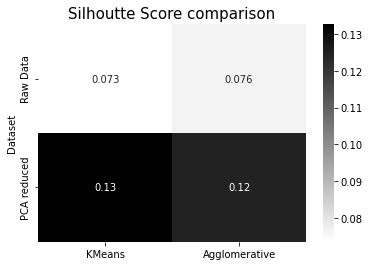

In [20]:
sil_comparison = sns.heatmap(comparison_df,cmap='binary', annot=True)
sil_comparison.set_title("Silhoutte Score comparison",fontsize=15)
plt.show()

Plotting Comparisson

c:\Users\NarayananM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


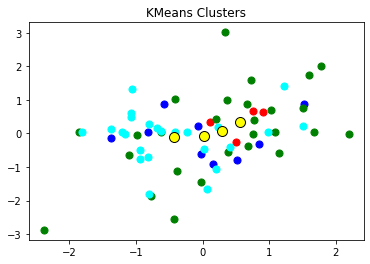

In [21]:
y_kmc = kmc.fit_predict(x_scaled)
plt.scatter(x_scaled[y_kmc==0, 0], x_scaled[y_kmc==0, 1], s=50, c='red', label ='KMC Cluster 1')
plt.scatter(x_scaled[y_kmc==1, 0], x_scaled[y_kmc==1, 1], s=50, c='blue', label ='KMC Cluster 2')
plt.scatter(x_scaled[y_kmc==2, 0], x_scaled[y_kmc==2, 1], s=50, c='green', label ='KMC Cluster 3')
plt.scatter(x_scaled[y_kmc==3, 0], x_scaled[y_kmc==3, 1], s=50, c='cyan', label ='KMC Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids KMC')
plt.title('KMeans Clusters')
plt.show()

c:\Users\NarayananM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


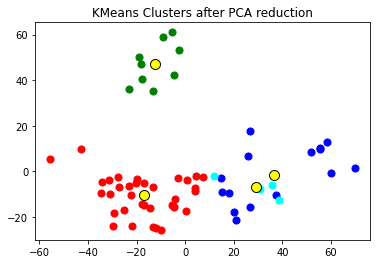

In [22]:
y_kmc_pca = kmc_pca.fit_predict(x_scaled_pca)
plt.scatter(x_scaled_pca[y_kmc_pca==0, 0], x_scaled_pca[y_kmc_pca==0, 1], s=50, c='red', label ='KMC PCA Cluster 1')
plt.scatter(x_scaled_pca[y_kmc_pca==1, 0], x_scaled_pca[y_kmc_pca==1, 1], s=50, c='blue', label ='KMC PCA Cluster 2')
plt.scatter(x_scaled_pca[y_kmc_pca==2, 0], x_scaled_pca[y_kmc_pca==2, 1], s=50, c='green', label ='KMC PCA Cluster 3')
plt.scatter(x_scaled_pca[y_kmc_pca==3, 0], x_scaled_pca[y_kmc_pca==3, 1], s=50, c='cyan', label ='KMC PCA Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc_pca.cluster_centers_[:, 0], kmc_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids KMC PCA')
plt.title('KMeans Clusters after PCA reduction')
plt.show()

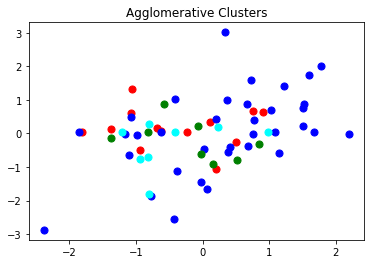

In [23]:
y_agg = agg.fit_predict(x_scaled)
plt.scatter(x_scaled[y_agg==0, 0], x_scaled[y_agg==0, 1], s=50, c='red', label ='Agg Cluster 1')
plt.scatter(x_scaled[y_agg==1, 0], x_scaled[y_agg==1, 1], s=50, c='blue', label ='Agg Cluster 2')
plt.scatter(x_scaled[y_agg==2, 0], x_scaled[y_agg==2, 1], s=50, c='green', label ='Agg Cluster 3')
plt.scatter(x_scaled[y_agg==3, 0], x_scaled[y_agg==3, 1], s=50, c='cyan', label ='Agg Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(agg.cluster_centers_[:, 0], agg.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids Agg')
plt.title('Agglomerative Clusters')
plt.show()

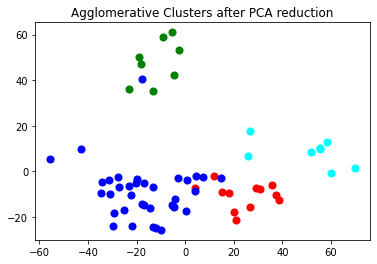

In [24]:
y_agg_pca = agg_pca.fit_predict(x_scaled_pca)
plt.scatter(x_scaled_pca[y_agg_pca==0, 0], x_scaled_pca[y_agg_pca==0, 1], s=50, c='red', label ='Agg PCA Cluster 1')
plt.scatter(x_scaled_pca[y_agg_pca==1, 0], x_scaled_pca[y_agg_pca==1, 1], s=50, c='blue', label ='Agg PCA Cluster 2')
plt.scatter(x_scaled_pca[y_agg_pca==2, 0], x_scaled_pca[y_agg_pca==2, 1], s=50, c='green', label ='Agg PCA Cluster 3')
plt.scatter(x_scaled_pca[y_agg_pca==3, 0], x_scaled_pca[y_agg_pca==3, 1], s=50, c='cyan', label ='Agg PCA Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(agg_pca.cluster_centers_[:, 0], agg_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids Agg PCA')
plt.title('Agglomerative Clusters after PCA reduction')
plt.show()